## Отчет по лабораторной работе №2 ##  
  
  
**по дисциплине: «Машинное обучение»**  
**на тему:  «Предварительная обработка данных»**  
**Вариант №7**

**Выполнил: Сапожников В.О. 19-ИВТ-3**

**Цель работы:** получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.  
  
###### Текст задания ######  
  1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
  2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
  3. Постройте график изменения средней цены на камеры по годам.
  4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.
  5. Добавьте в набор данных признак, являющийся произведением двух других признаков.
  6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
  7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.
  8. Определите год, в который было выпущено максимально количество новых камер.
  
  
Функции библиотеки Pandas: head, tail, info, describe, dropna, drop_duplicates, shape продемонстрированы в ходе выполнения работы.


In [160]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from scipy import stats
%pylab inline

camera_df  = pd.read_csv('camera_dataset.csv')    # Создание DataFrame на основе прочитанных данных

Populating the interactive namespace from numpy and matplotlib


D:\Влад\УЧЕБА\Семестр 2.2\Машинное обучение\Лабораторные\WinPython\python-3.8.7.amd64\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['unique', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [161]:
camera_df    # Вывод исходных данных 

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1035,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1036,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1037,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


Демонстрация функии head() - выводит первые записи таблицы

In [162]:
camera_df.head(10)    # По умолчанию выводит 5 1ых записей
                      # Вывод 10 1ых записей

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
5,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
6,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
7,Agfa ePhoto CL50,1999,1280.0,640.0,1.0,34.0,102.0,0.0,0.0,8.0,0.0,0.0,179.0
8,Canon PowerShot 350,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0
9,Canon PowerShot 600,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0


Демонстрация функии tail() - выводит последние записи таблицы

In [163]:
camera_df.tail(10)    # По умолчанию выводит 5 последних записей
                      # Вывод 10 1ых записей

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1029,Toshiba PDR-M3,1999,1280.0,640.0,1.0,38.0,115.0,90.0,25.0,4.0,380.0,122.0,62.0
1030,Toshiba PDR-M4,1999,1600.0,800.0,1.0,40.0,40.0,50.0,10.0,8.0,290.0,112.0,62.0
1031,Toshiba PDR-M5,1999,1600.0,800.0,1.0,40.0,120.0,90.0,25.0,8.0,350.0,130.0,62.0
1032,Toshiba PDR-M60,2000,1792.0,896.0,2.0,38.0,86.0,50.0,5.0,4.0,320.0,121.0,449.0
1033,Toshiba PDR-M61,2001,1792.0,896.0,2.0,38.0,114.0,50.0,5.0,8.0,310.0,123.0,62.0
1034,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1035,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1036,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1037,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0
1038,Toshiba PDR-T10,2002,1600.0,800.0,1.0,38.0,38.0,40.0,20.0,8.0,180.0,86.0,129.0


##### 6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [164]:
camera_df.info()    # Вывод информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Model                    1039 non-null   object
 1   Release date             1039 non-null   object
 2   Max resolution           1039 non-null   object
 3   Low resolution           1039 non-null   object
 4   Effective pixels         1039 non-null   object
 5   Zoom wide (W)            1039 non-null   object
 6   Zoom tele (T)            1039 non-null   object
 7   Normal focus range       1039 non-null   object
 8   Macro focus range        1038 non-null   object
 9   Storage included         1037 non-null   object
 10  Weight (inc. batteries)  1037 non-null   object
 11  Dimensions               1037 non-null   object
 12  Price                    1039 non-null   object
dtypes: object(13)
memory usage: 105.6+ KB


In [165]:
camera_df = camera_df.drop([0])    # Удаление строки с указанием типов 

Пытаемся удалить дублирубщееся строки и выводим вновь информацию о таблице

In [166]:
camera_df = camera_df.drop_duplicates()
camera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 1 to 1038
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Model                    1038 non-null   object
 1   Release date             1038 non-null   object
 2   Max resolution           1038 non-null   object
 3   Low resolution           1038 non-null   object
 4   Effective pixels         1038 non-null   object
 5   Zoom wide (W)            1038 non-null   object
 6   Zoom tele (T)            1038 non-null   object
 7   Normal focus range       1038 non-null   object
 8   Macro focus range        1037 non-null   object
 9   Storage included         1036 non-null   object
 10  Weight (inc. batteries)  1036 non-null   object
 11  Dimensions               1036 non-null   object
 12  Price                    1038 non-null   object
dtypes: object(13)
memory usage: 113.5+ KB


По вновь выведенной информации можно сделать вывод, что дублирующихся строк в таблице нет

Оптимальное преобразование типов по столбцам

In [167]:
camera_df["Release date"]            = pd.to_numeric(camera_df["Release date"])
camera_df["Max resolution"]          = pd.to_numeric(camera_df["Max resolution"])
camera_df["Low resolution"]          = pd.to_numeric(camera_df["Low resolution"])
camera_df["Effective pixels"]        = pd.to_numeric(camera_df["Effective pixels"])
camera_df["Zoom wide (W)"]           = pd.to_numeric(camera_df["Zoom wide (W)"])
camera_df["Zoom tele (T)"]           = pd.to_numeric(camera_df["Zoom tele (T)"])
camera_df["Normal focus range"]      = pd.to_numeric(camera_df["Normal focus range"])
camera_df["Macro focus range"]       = pd.to_numeric(camera_df["Macro focus range"])
camera_df["Storage included"]        = pd.to_numeric(camera_df["Storage included"])
camera_df["Weight (inc. batteries)"] = pd.to_numeric(camera_df["Weight (inc. batteries)"])
camera_df["Dimensions"]              = pd.to_numeric(camera_df["Dimensions"])
camera_df["Price"]                   = pd.to_numeric(camera_df["Price"])

In [168]:
camera_df.info()    # Вывод информации о таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 1 to 1038
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 113.5+ KB


Удаление строк с нулевыми значениями (+ демонстраций функции shape[])

In [169]:
print("Число записей в таблице до удаления: {0}".format(camera_df.shape[0]))
camera_df.replace(0.0, np.nan, inplace = True)    # считаем строку со значениями 0.0 нулевой
camera_df.dropna(inplace = True)                  # удаляем нулевые строки
print("Число записей в таблице после удаления: {0}".format(camera_df.shape[0]))

Число записей в таблице до удаления: 1038
Число записей в таблице после удаления: 773


Демонстрация функции describe() - выводит описательную статистику о таблице

In [170]:
camera_df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,2003.780078,2469.087969,1856.437257,4.525226,35.836999,134.375162,50.122898,8.539457,20.107374,261.485123,102.023933,356.510996
std,2.514366,647.903540,677.167966,2.533904,2.994698,88.407421,17.500604,7.528361,28.720560,132.738821,17.093495,460.979211
min,1998.000000,1152.000000,576.000000,1.000000,23.000000,28.000000,4.000000,1.000000,1.000000,100.000000,30.000000,14.000000
25%,2002.000000,2048.000000,1280.000000,3.000000,35.000000,105.000000,40.000000,4.000000,9.000000,178.000000,91.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,112.000000,50.000000,7.000000,16.000000,215.000000,99.000000,199.000000
75%,2006.000000,3072.000000,2313.000000,7.000000,38.000000,117.000000,60.000000,10.000000,24.000000,315.000000,110.000000,384.000000
max,2007.000000,4224.000000,3840.000000,12.000000,51.000000,504.000000,120.000000,85.000000,450.000000,1190.000000,240.000000,4999.000000


##### 1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

<AxesSubplot:>

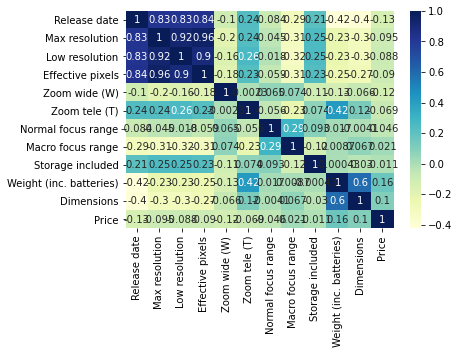

In [171]:
camera_df_heatmap = camera_df.drop(['Model'], axis='columns').corr()    # Создаем новый DF исключая столбцы 'Model' и 'Release date'
sns.heatmap(camera_df_heatmap, cmap="YlGnBu", annot=True)               # Визуализация при помощи модуля seaborn

Можно сделать вывод, что камеры с каждым годом камеры имеют всё более высокое разрешение, а их цена снижается. Цена растёт по нарастающей в зависимости от веса камеры, размеры, зума и фокуса.

##### 2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [172]:
# Для вычисления значений корреляций используется модуль scipy
# При вычислении корреляций передаются два параметра между, которыми её необходимо найти
# Возвращается кортеж 
kor_Pearson = stats.pearsonr(camera_df["Price"], camera_df["Max resolution"])
print("Критерий Пирсона: {0}. P-значение: {1};".format(kor_Pearson[0], kor_Pearson[1]))

kor_Spearman = stats.spearmanr(camera_df["Price"],camera_df["Max resolution"]) 
print("Критерий Спирмена: {0}. P-значение: {1}".format(kor_Spearman[0], kor_Spearman[1]))

Критерий Пирсона: -0.09515661977706805. P-значение: 0.00811239398370661;
Критерий Спирмена: -0.03163061198225854. P-значение: 0.37982508301417606


Значения критериев незначительно отличаются. Так как критерии отрицателены, то можно сказать, что величины обратно зависимы, т.е. чем выше значение одной переменной, тем ниже значение другой. 
P - значение критерия Пирсона мало, значит нулева гипотеза - пемеернные линейно незваисимы - отвергается.

Гистограмма для Price:

D:\Влад\УЧЕБА\Семестр 2.2\Машинное обучение\Лабораторные\WinPython\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

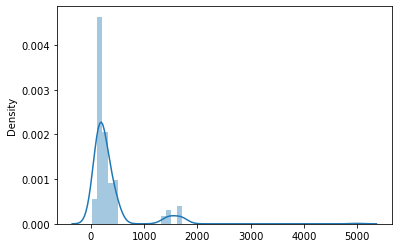

In [173]:
sns.distplot(camera_df["Price"].tolist())

Гистограмма для Max resolution:

D:\Влад\УЧЕБА\Семестр 2.2\Машинное обучение\Лабораторные\WinPython\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

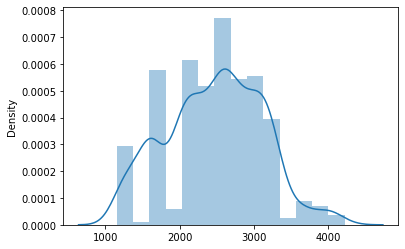

In [174]:
sns.distplot(camera_df["Max resolution"].tolist())

##### 3. Постройте график изменения средней цены на камеры по годам

Release date
1998    382.533333
1999    309.818182
2000    403.400000
2001    552.851351
2002    475.042857
2003    351.538462
2004    370.840000
2005    326.981982
2006    250.741071
2007    280.038462
Name: Price, dtype: float64


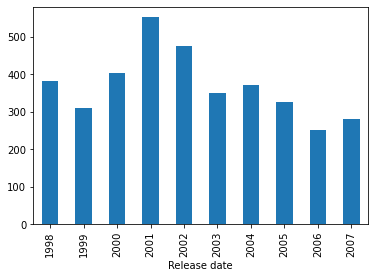

In [175]:
mean_price = camera_df.groupby('Release date')['Price'].mean()    # Вычисление среднего значения цены, сгруппированные по годам 
print (mean_price)
mean_price.plot.bar()
plt.show()

##### 4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.

In [176]:
list_firm = camera_df["Model"].tolist()    # Переводим объект Series в список

# Поэлементно делим элементы - строки по пробелам и заносим в список
# по 1ому отдленному слову.    
list_firm = list(map(lambda firm: firm.split(" ")[0], list_firm))   

# получаем массив уникальных отсортированных значений и 
# массив индексов уникального массив
unique, pos = np.unique(list_firm, return_inverse=True)


counts = np.bincount(pos)    # массив с кол-вом вхождений
maxpos = counts.argmax()     # получение индекса max значения

print("Компания, камеры которой наиболее часто встречаются в наборе данных: {0} - {1} записи".format(unique[maxpos], counts[maxpos]))

Компания, камеры которой наиболее часто встречаются в наборе данных: Olympus - 102 записи


##### 5. Добавьте в набор данных признак, являющийся произведением двух других признаков.

In [177]:
camera_df["foto size"] = camera_df["Max resolution"] * camera_df["Effective pixels"]    # Добавляем признак размер фото:
                                                                                        # произведения стобцов "максимальное разрешение" и "эффективные пиксели"
camera_df

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,foto size
6,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0,1600.0
10,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,1280.0
11,Canon PowerShot A100,2002,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,1280.0
12,Canon PowerShot A20,2001,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,1600.0
13,Canon PowerShot A200,2002,1600.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0,6144.0
1035,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0,6144.0
1036,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0,6144.0
1037,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0,7200.0


##### 7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.

In [178]:
model = camera_df.groupby('Model')['Price'].max().sort_values()    # Группируем модели по цене, по возрастанию 
print(model)                                                       
print ("Minimum: " + model.index[0] + ", Maximum: " + model.index[len(model) - 1])

Model
JVC GC-QX5HD            14.0
JVC GC-QX3HD            14.0
Toshiba PDR-M70         62.0
Toshiba PDR-M65         62.0
Toshiba PDR-M81         62.0
                       ...  
Olympus C-21          1699.0
Olympus C-1           1699.0
Olympus C-300 Zoom    1699.0
Ricoh GR Digital      4999.0
Ricoh RDC-i500        4999.0
Name: Price, Length: 773, dtype: float64
Minimum: JVC GC-QX5HD, Maximum: Ricoh RDC-i500


##### 8. Определите год, в который было выпущено максимально количество новых камер.

In [179]:
max = camera_df['Release date'].sort_values().value_counts()
print(max)
print("Год, в котором было выпущено максимальное кол-ва камер: ")
max.idxmax()

2007    130
2006    112
2005    111
2004    100
2003     78
2001     74
2002     70
2000     50
1999     33
1998     15
Name: Release date, dtype: int64
Год, в котором было выпущено максимальное кол-ва камер: 


2007